In [33]:
# Import libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from csv
test_values = pd.read_csv('test_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_values = pd.read_csv('train_values.csv')

In [3]:
# View test data
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# View training labels
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
# View training values
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Merge training datasets to have 1 df
df = pd.merge(train_values, train_labels, on='building_id')

In [10]:
# Check for amount of duplicated data
df.duplicated().sum()

0

In [15]:
# Check the amount of null values in each columns
df.isnull().sum() / len(df) * 100

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [32]:
# Define anomaly detection visualization function
def anomaly_detection(data, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.boxplot(data=data, x=col)
        plt.title(f'Feature: {col}');
        

In [25]:
# Lambda function to deal with string issues for columns
col_trans = lambda x: x.replace(',','').split()

In [27]:
# Defining Categorical Columns
cat_st = 'land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, legal_ownership_status'
cat_cols = col_trans(cat_st)

In [28]:
# Defining Univariate columns
uni_st = 'geo_level_1_id, geo_level_2_id, geo_level_3_id, count_floors_pre_eq, age, area_percentage, height_percentage, count_families'
uni_cols = col_trans(uni_st)

In [29]:
# Defining binary columns
binary_st = 'has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_engineered, has_superstructure_other, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other'
binary_cols = col_trans(binary_st)

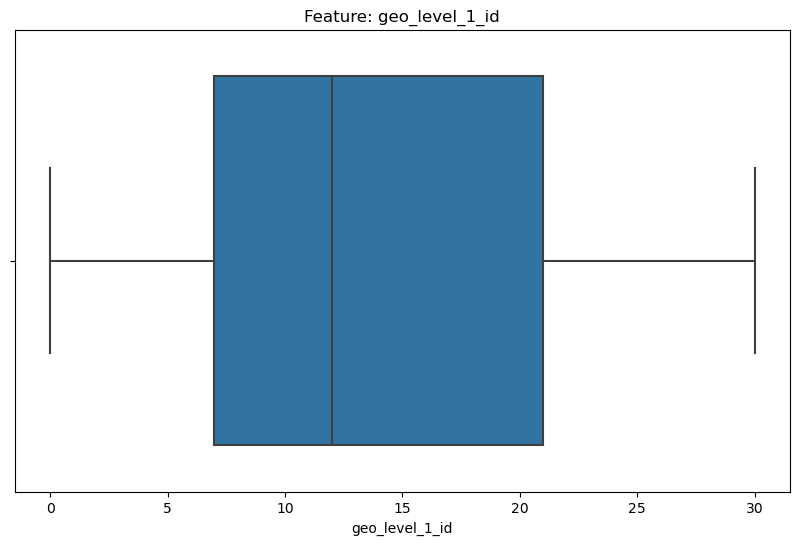

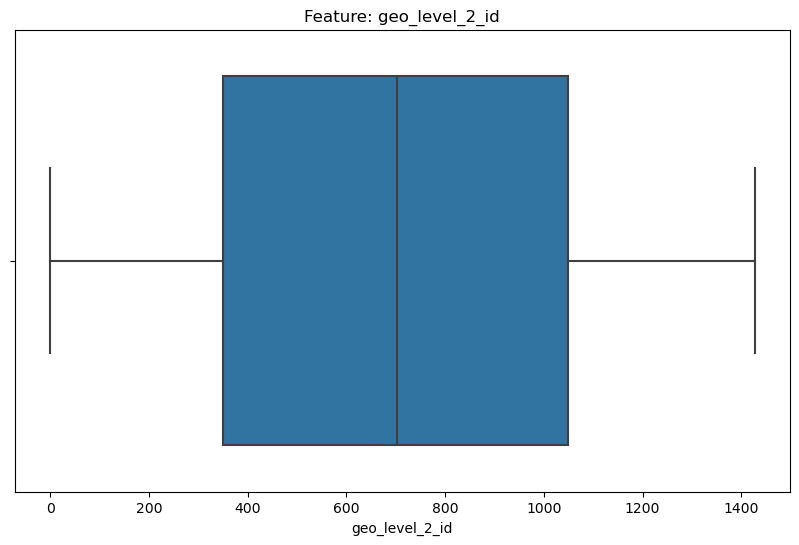

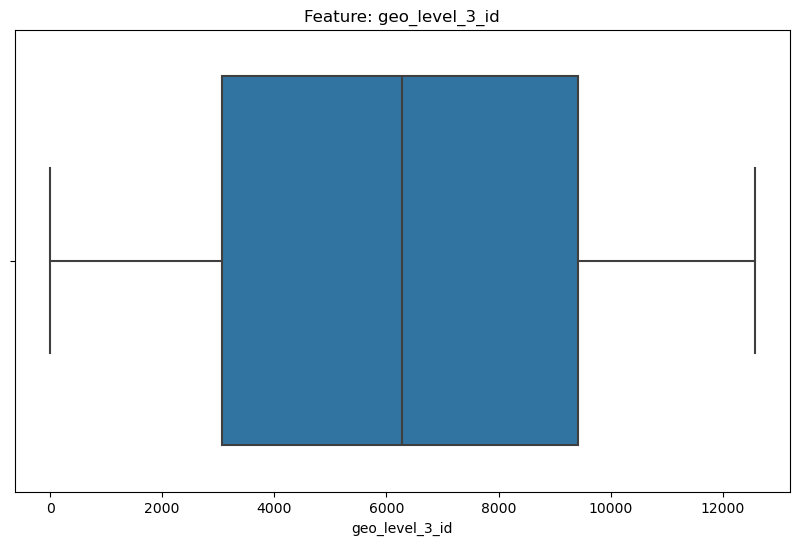

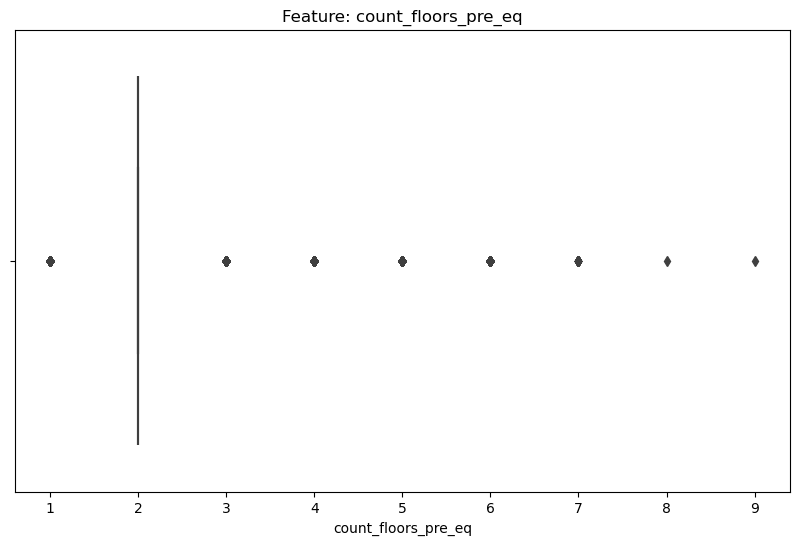

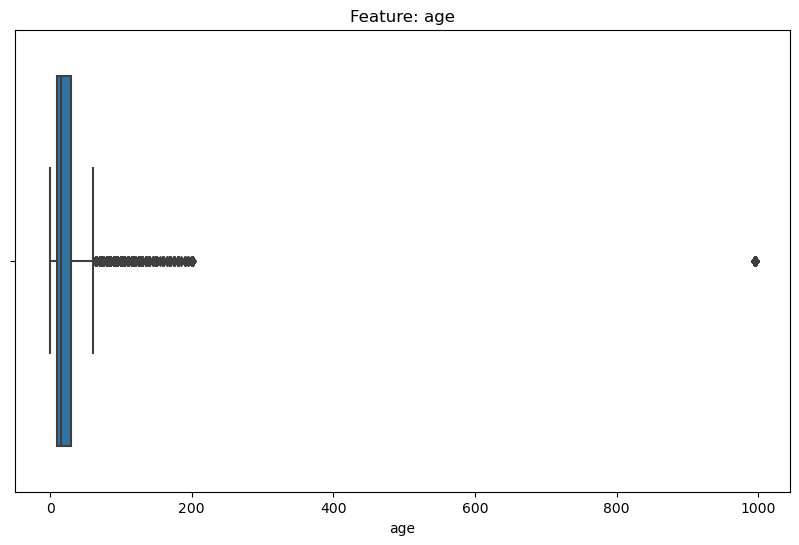

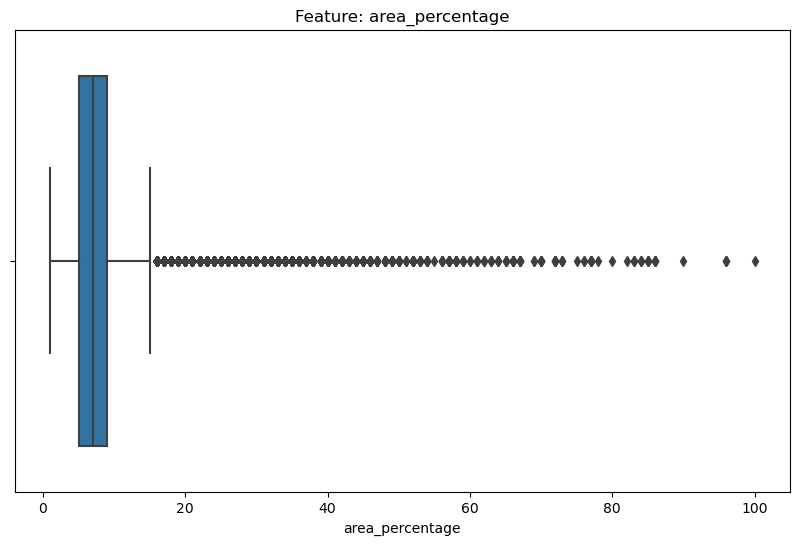

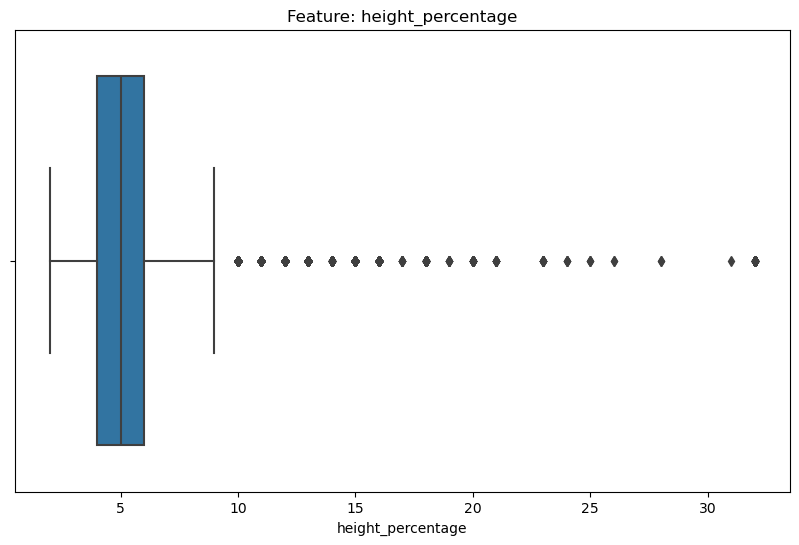

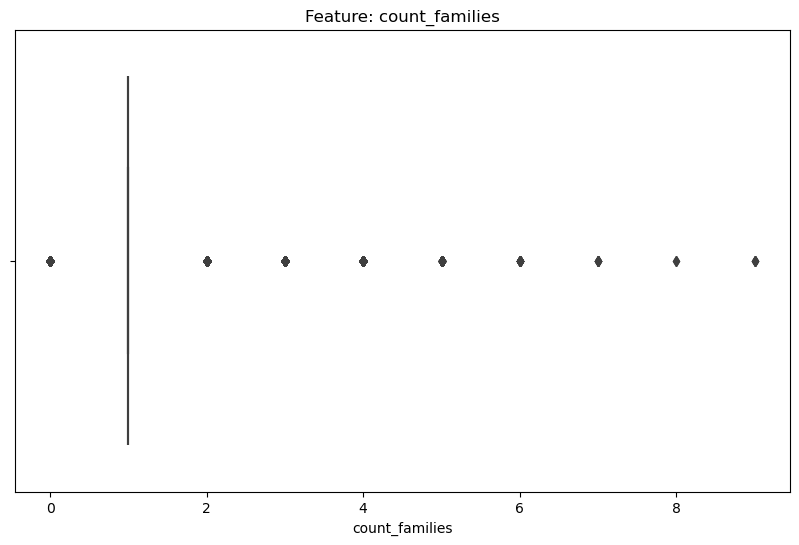

In [31]:
# Univariant columns anomaly detection
anomaly_detection(data=df, columns=uni_cols)